<a href="https://colab.research.google.com/github/anvi2003/Laptop-Price-Predictor/blob/main/Laptop_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv

--2023-07-06 18:13:00--  https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182053 (178K) [text/plain]
Saving to: ‘laptop_data.csv’

laptop_data.csv     100%[===================>] 177.79K  --.-KB/s    in 0.03s   

2023-07-06 18:13:00 (6.52 MB/s) - ‘laptop_data.csv’ saved [182053/182053]



In [3]:
df=pd.read_csv('laptop_data.csv')

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape
# limitation (small data set)

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum() #no missing

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.drop(columns=['Unnamed: 0'],inplace= True)

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [15]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

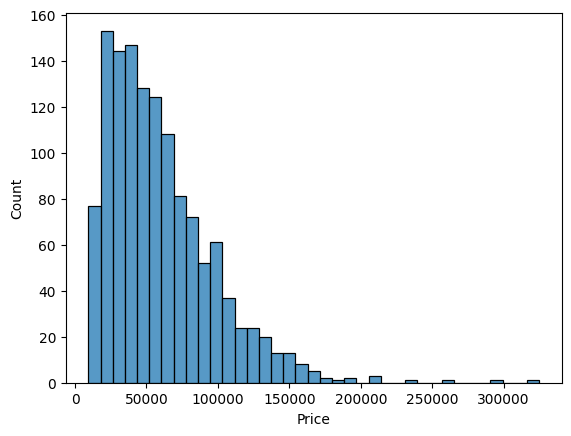

In [16]:
sns.histplot(df['Price'])

<Axes: >

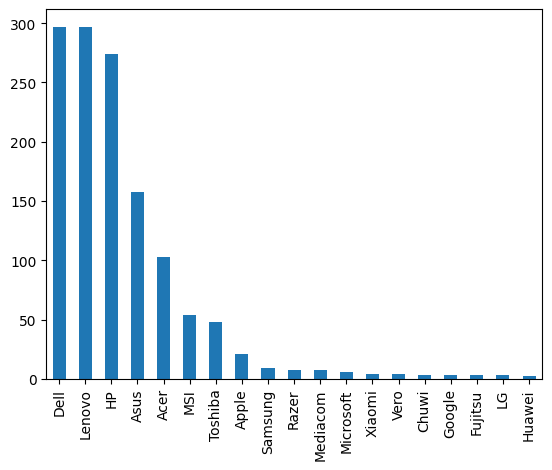

In [17]:
df['Company'].value_counts().plot(kind='bar')

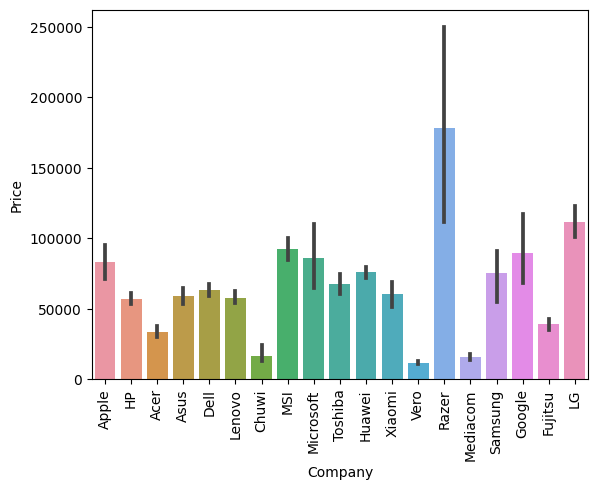

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

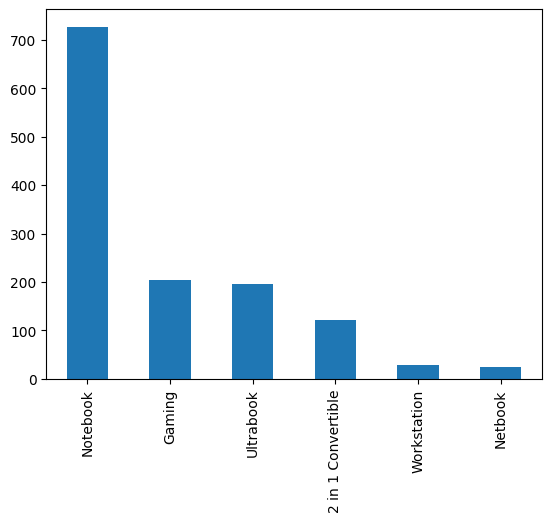

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

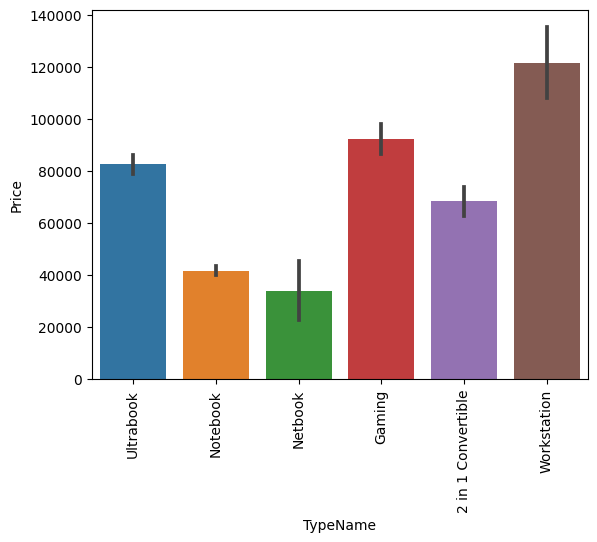

In [20]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-21-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

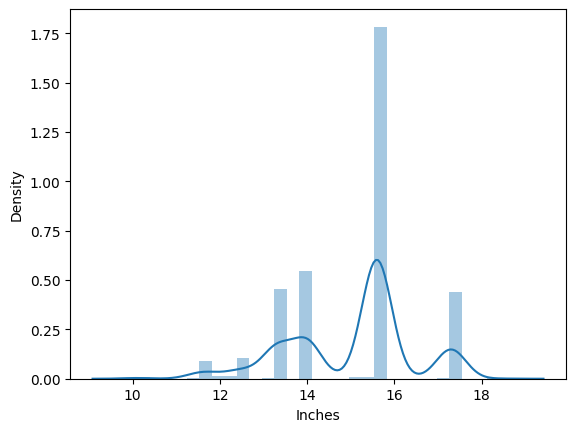

In [21]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

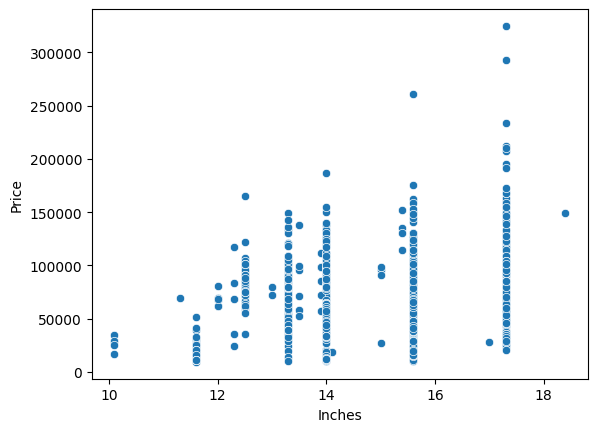

In [22]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [23]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [24]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [25]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
226,Dell,Notebook,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,1TB HDD,AMD Radeon R7 M445,Windows 10,2.30,45768.0528,1
193,Lenovo,Notebook,17.3,1600x900,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,2.80,37189.4400,0
575,Mediacom,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4,32GB SSD,Intel HD Graphics,Windows 10,1.40,13266.7200,0
1098,HP,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,1.96,26640.0000,0
1200,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,AMD Radeon R7 M440,Windows 10,2.30,26586.7200,0


<Axes: >

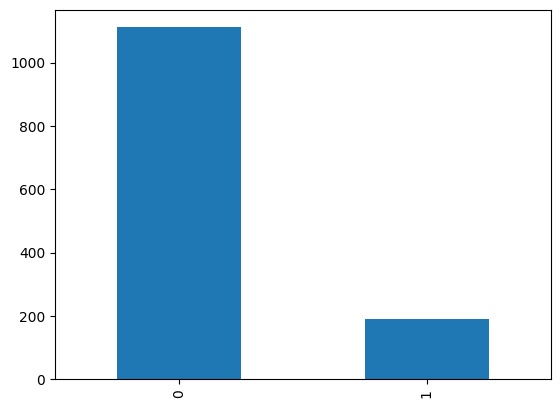

In [26]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

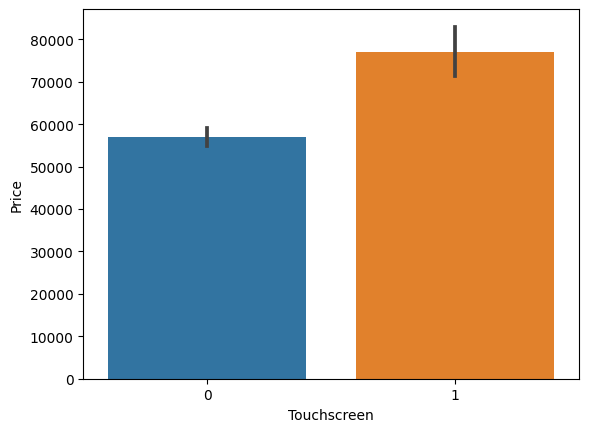

In [27]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [28]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: >

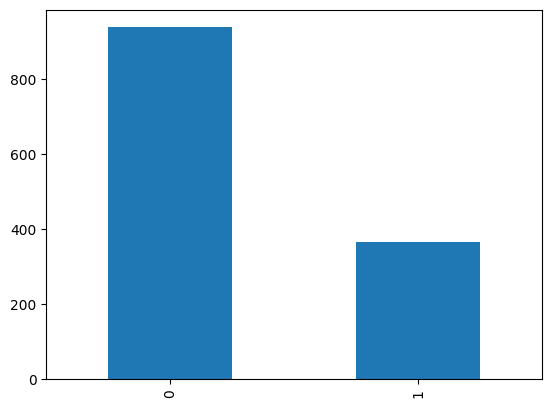

In [30]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

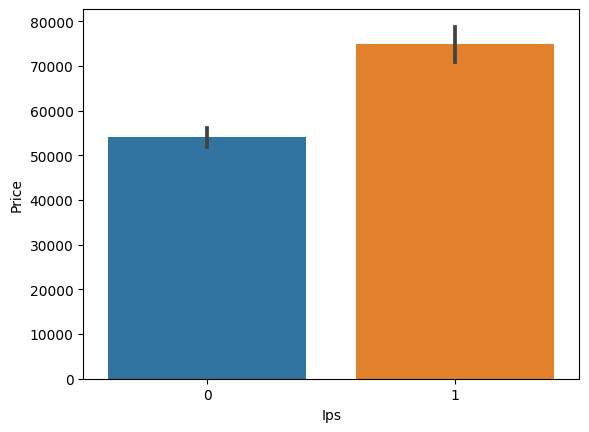

In [31]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [32]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True) #n=1 means that only one split will be performed on each string

In [33]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [34]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0,0,1366,768
1024,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,500GB HDD,Intel HD Graphics 520,Windows 10,2.09,55754.3232,0,0,Full HD 1920,1080
278,Lenovo,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.80,26053.9200,0,0,1600,900
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.70,207259.2000,0,0,Full HD 1920,1080
485,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75,55890.7200,0,1,IPS Panel Full HD 1920,1080


In [35]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

.str.replace(',', ''):
This function is applied to each element in the 'X_res' column and replaces any occurrence of ',' (comma) with an empty string ''.
It essentially removes commas from the values in the 'X_res' column.

.str.findall(r'(\d+\.?\d+)'):
This function is applied to each element in the modified 'X_res' column. It searches for patterns that match the regular expression r'(\d+\.?\d+)'.

\d+ matches one or more digits.

\.? matches an optional period character '.'.

\d+ matches one or more digits again.



In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [38]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [40]:
df.corr()['Price']

<ipython-input-40-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [42]:
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [43]:
df.corr()['Price']

<ipython-input-43-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64

In [45]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [46]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [47]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [48]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [49]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [50]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

df['Cpu']: This selects the 'Cpu' column from the DataFrame 'df', assuming that 'Cpu' is a column in the DataFrame.

.apply(): This function is used to apply a function to each element in the 'Cpu' column.

lambda x: x.split()[0:3]: This lambda function is applied to each element (x) in the 'Cpu' column.

x.split() splits the string value of each element into a list of substrings. By default, it splits on whitespace, so it effectively splits the string into separate words.
[0:3] selects the first three elements from the resulting list.
The lambda function essentially splits each 'Cpu' value into words and returns the first three words as a list.


In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [52]:
def fetch_processor(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [53]:
df['Cpu brand']=df['Cpu Name'].apply(fetch_processor)

In [54]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
691,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.70,37242.72,0,0,157.350512,Intel Core i5,Intel Core i5
995,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,61272.00,0,0,276.053530,Intel Core i5,Intel Core i5
465,Asus,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.00,16197.12,0,0,100.454670,Intel Pentium Quad,Other Intel Processor
1079,HP,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,2.31,50083.20,0,0,141.211998,Intel Core i5,Intel Core i5
509,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.40,61218.72,0,1,141.211998,Intel Core i7,Intel Core i7
844,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 7,1.54,99633.60,0,0,157.350512,Intel Core i7,Intel Core i7
512,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.18,44542.08,0,0,141.211998,Intel Core i5,Intel Core i5
94,Asus,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,55890.72,0,0,157.350512,Intel Core i7,Intel Core i7
828,Acer,Netbook,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35,18914.40,0,1,135.094211,Intel Celeron Dual,Other Intel Processor
388,Dell,Workstation,Intel Core i7 6820HQ 2.7GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.00,113752.80,0,1,141.211998,Intel Core i7,Intel Core i7


<Axes: >

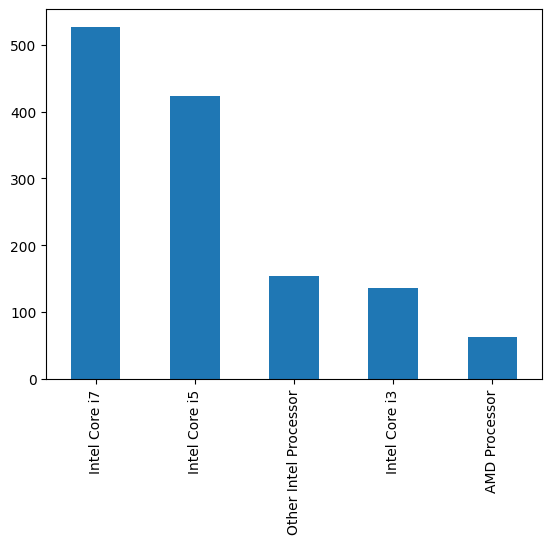

In [55]:
df['Cpu brand'].value_counts().plot(kind='bar')

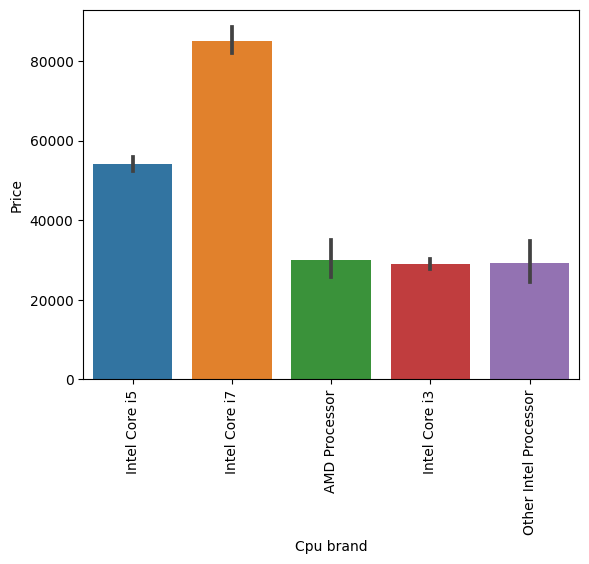

In [56]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [58]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: >

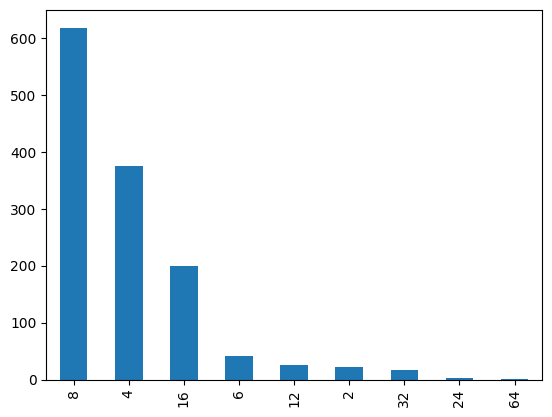

In [59]:
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

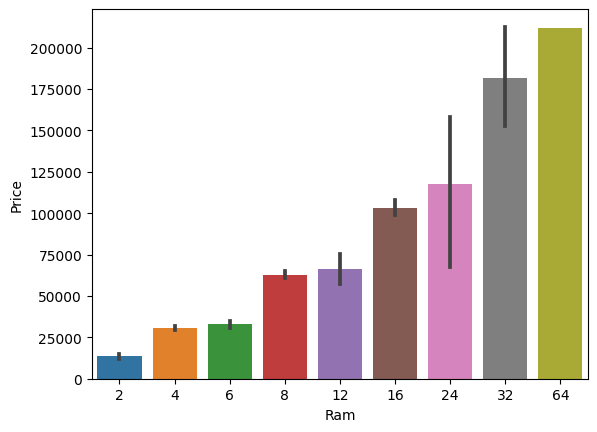

In [60]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [61]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [62]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)

df['Memory']: This selects the 'Memory' column from the DataFrame 'df', assuming that 'Memory' is a column in the DataFrame.

.astype(str): This converts the values in the 'Memory' column to strings. It ensures that the data type of the column is string before applying any string operations.

.replace('\.0', '', regex=True): This function replaces occurrences of the pattern '.0' in the 'Memory' column with an empty string ''. It uses the .replace() method of the string to perform the replacement.

When regex=True:
The pattern '\.0' is interpreted as a regular expression pattern.

When regex=False (default):
The pattern '\.0' is treated as a plain string.

In summary, by setting regex=True, the .replace() function treats the pattern '\.0' as a regular expression pattern, allowing for more flexible and pattern-based replacements in the 'Memory' column.

In [63]:
df['Memory']=df["Memory"].str.replace('GB','')

In [64]:
df['Memory']=df['Memory'].str.replace('TB','000')
new =df['Memory'].str.split("+",n=1,expand=True)

In [65]:
df.sample(26)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
204,Dell,Workstation,16,256 SSD + 1000 HDD,Nvidia Quadro M1200,Windows 10,2.80,162770.4000,0,0,282.423996,Other Intel Processor
1140,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,2.80,130003.2000,1,1,209.800683,Intel Core i7
901,Asus,Gaming,32,256 SSD + 256 SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,68145.1200,0,1,127.335675,Intel Core i7
1302,Asus,Notebook,4,500 HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0,0,100.454670,Other Intel Processor
124,Acer,Notebook,4,256 SSD,AMD Radeon R5,Windows 10,2.10,24029.2800,0,0,100.454670,AMD Processor
488,Lenovo,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.36,95797.4400,0,1,176.232574,Intel Core i7
74,Acer,Notebook,8,1000 HDD,Intel HD Graphics 520,Windows 10,2.10,20725.9200,0,0,111.935204,Intel Core i3
1028,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.29,86526.7200,1,0,276.053530,Intel Core i5
823,MSI,Gaming,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.40,63882.7200,0,0,141.211998,Intel Core i5
1190,Lenovo,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,43636.3200,0,1,141.211998,Intel Core i5


When expand=True, the str.split() function will return a DataFrame with the split values expanded into separate columns. Each column represents a split value based on the specified delimiter.

In [66]:
df['first']=new[0]
df['first']=df['first'].str.strip()

The str.strip() method is a string method in Python that is used to remove leading and trailing whitespace characters from a string.

In [67]:
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage']=df["first"].apply(lambda x:1 if "Flash Storage" in x else 0)

In [68]:
df['first']=df['first'].str.replace(r'\D','')

<ipython-input-68-77d8502aab1b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first']=df['first'].str.replace(r'\D','')


By using r'\D' as the pattern, it matches any non-digit character in the 'first' column values and replaces them with an empty string.

In [69]:
df.sample(15)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
1251,HP,Notebook,4,500 HDD,AMD Radeon R4 Graphics,Windows 10,1.86,21258.720,0,0,100.454670,AMD Processor,500,None,1,0,0,0
837,Toshiba,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,2.00,35644.320,0,0,100.454670,Intel Core i3,500,None,1,0,0,0
24,HP,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.91,35111.520,0,0,141.211998,Intel Core i7,256,None,0,1,0,0
1144,HP,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 520,Windows 10,1.48,95850.720,1,0,220.842824,Intel Core i7,256,None,0,1,0,0
872,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,2.00,73952.640,0,1,141.211998,Intel Core i7,256,None,0,1,0,0
607,Lenovo,Notebook,6,1000 HDD,Intel HD Graphics 620,Windows 10,2.40,30049.920,0,0,141.211998,Intel Core i5,1000,None,1,0,0,0
1138,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.720,0,0,127.335675,Intel Core i7,256,1000 HDD,0,1,0,0
782,Toshiba,Ultrabook,16,512 SSD,Nvidia GeForce 930M,Windows 10,1.47,93985.920,0,1,157.350512,Intel Core i7,512,None,0,1,0,0
346,HP,Notebook,2,32 Flash Storage,Intel HD Graphics 400,Windows 10,1.44,14865.120,0,0,111.935204,Other Intel Processor,32,None,0,0,0,1
688,HP,Notebook,6,2000 HDD,AMD Radeon R7 M440,Windows 10,2.65,30316.320,0,1,127.335675,AMD Processor,2000,None,1,0,0,0


In [70]:
df['Layer1HDD'].value_counts()

0    928
1    375
Name: Layer1HDD, dtype: int64

In [71]:
df['second'].fillna("0",inplace=True)

In [72]:
df['Layer2HDD']=df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)


df['second']=df['second'].str.replace('\D','')


df['first']=df['first'].astype(int)
df['second']=df['second'].astype(int)




<ipython-input-72-1ca55ad2df7b>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second']=df['second'].str.replace('\D','')


In [73]:
df.sample(20)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
928,Dell,Notebook,4,1000 HDD,Intel HD Graphics 620,Windows 10,2.18,37725.4368,0,0,...,1000,0,1,0,0,0,0,0,0,0
872,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,2.00,73952.6400,0,1,...,256,0,0,1,0,0,0,0,0,0
1091,HP,Notebook,4,1000 HDD,Intel HD Graphics 520,No OS,1.86,18434.3472,0,0,...,1000,0,1,0,0,0,0,0,0,0
575,Mediacom,Notebook,4,32 SSD,Intel HD Graphics,Windows 10,1.40,13266.7200,0,0,...,32,0,0,1,0,0,0,0,0,0
139,HP,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,1.32,37242.7200,0,1,...,256,0,0,1,0,0,0,0,0,0
216,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce GTX 940MX,No OS,2.80,31381.9200,0,0,...,1000,0,1,0,0,0,0,0,0,0
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1175,Asus,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,2.00,40972.3200,0,0,...,256,0,0,1,0,0,0,0,0,0
212,HP,Notebook,4,500 HDD,Intel HD Graphics 520,No OS,2.10,18594.7200,0,0,...,500,0,1,0,0,0,0,0,0,0
146,HP,Ultrabook,8,512 SSD,Intel HD Graphics 515,Windows 10,0.97,107305.9200,1,1,...,512,0,0,1,0,0,0,0,0,0


In [74]:
df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

In [75]:
df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [76]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [77]:
df.drop(columns=['Memory'],inplace=True)

In [78]:
df.corr()['Price']

<ipython-input-78-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [79]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [80]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [81]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [82]:
df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [83]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [84]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [85]:
df=df[df['Gpu brand']!='ARM']

In [86]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

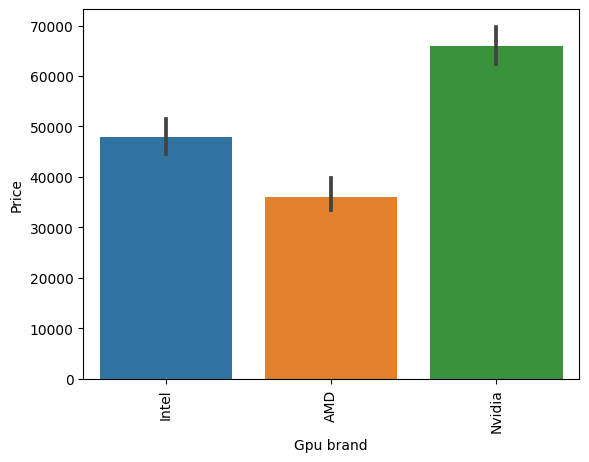

In [87]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

By passing np.median as the estimator, the bar plot will display the median value of the 'Price' variable for each category of the 'Gpu brand' variable. The height of each bar will represent the median price for the corresponding 'Gpu brand'.

In [88]:
df.drop(columns=['Gpu'],inplace=True)

In [89]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

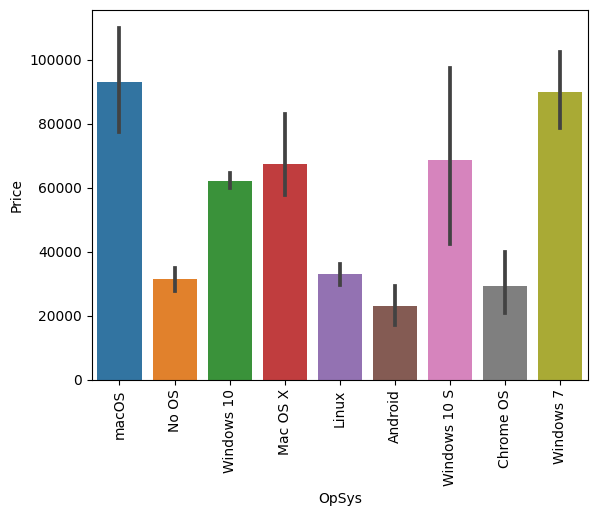

In [90]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show

In [91]:
def cat_os(inp):
  if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 5':
    return 'Windows'
  elif inp=='macOS' or inp=='Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'




In [92]:
df['os']=df['OpSys'].apply(cat_os)

In [93]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [94]:
df.drop(columns=['OpSys'],inplace=True)

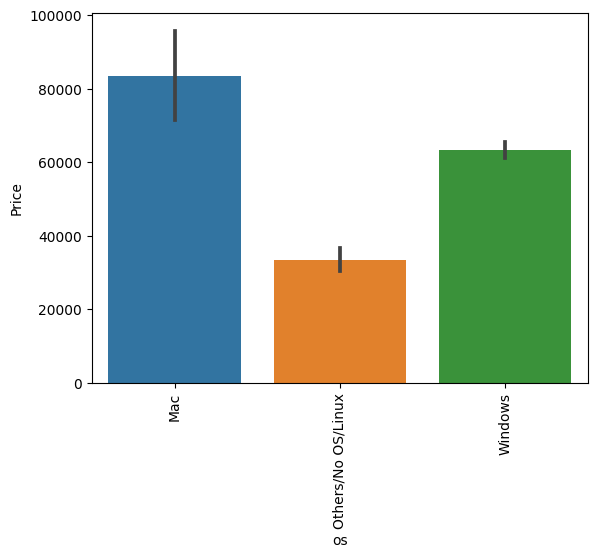

In [95]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-96-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

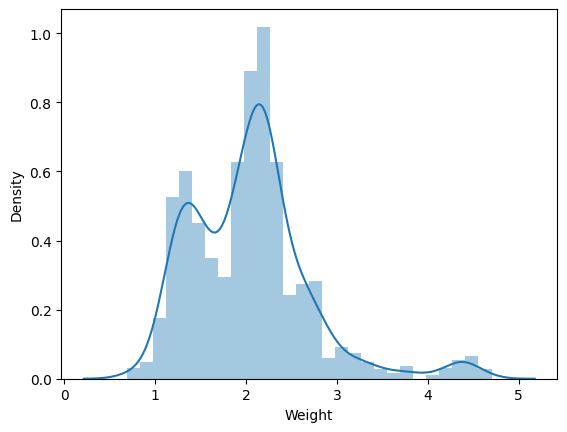

In [96]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

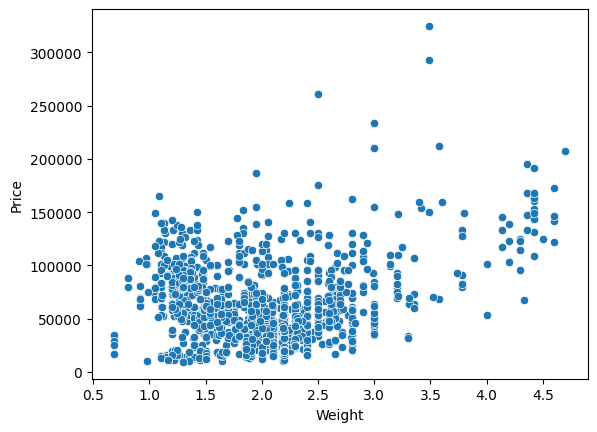

In [97]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [98]:
df.corr()['Price']

<ipython-input-98-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<ipython-input-99-4c5b436bea14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) #light shade: very strong correlation. If two features have very light shade ,you can keep any one of them


<Axes: >

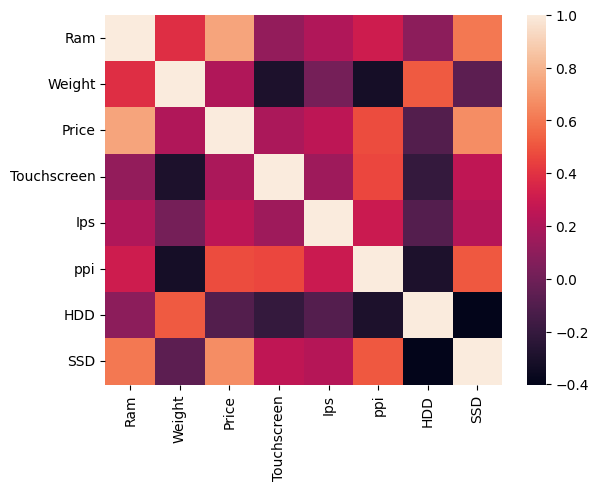

In [99]:
sns.heatmap(df.corr()) #light shade: very strong correlation. If two features have very light shade ,you can keep any one of them

<ipython-input-100-6a4a02669d9f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

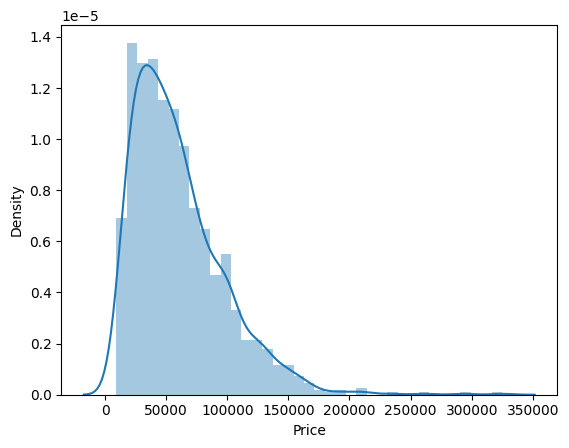

In [100]:
sns.distplot((df['Price']))

Skewness can affect the interpretation of data because it indicates a departure from a symmetrical or normal distribution.   

Skewness can affect the central tendency and spread measures of a distribution, such as the mean and standard deviation. In a skewed distribution, the mean tends to be pulled towards the longer tail, leading to biased estimates of the typical value or average.

<ipython-input-101-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

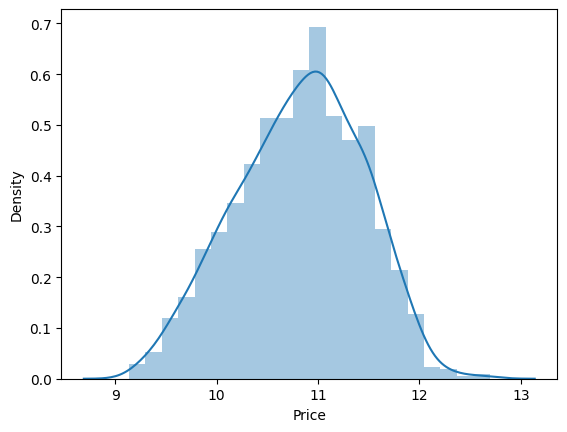

In [101]:
sns.distplot(np.log(df['Price']))

In [102]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [103]:
x

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [104]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [106]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

The ColumnTransformer class is typically used in the context of building machine learning pipelines, where different columns may require different preprocessing techniques such as scaling, one-hot encoding, or imputation.

A pipeline allows you to chain multiple steps together, such as data preprocessing, feature selection, and model training, into a single object that can be trained and used for making predictions.

OneHotEncoder: The OneHotEncoder class is used for converting categorical features into a numerical representation known as one-hot encoding. It takes categorical data and transforms it into a binary vector where each column represents a unique category. This encoding is often necessary when working with machine learning algorithms that expect numerical input.

In [108]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [109]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score: 0.8090039637333736
MAE 0.2090987295469493


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


'col_tnf': This is a string identifier for the transformer. It can be any name you choose to identify this specific transformation.

 A sparse matrix is a memory-efficient representation that only stores non-zero elements.

 Setting sparse=False as a parameter in the OneHotEncoder constructor ensures that the output is a dense array rather than a sparse matrix. This can be useful if you need to perform operations that require dense arrays or if you prefer working with explicit zero values in your encoded features.

drop='first':
When one-hot encoding categorical variables, it is common to drop the first category of each feature to avoid the issue of multicollinearity. Multicollinearity occurs when there is a high correlation between two or more independent variables, which can cause instability and inaccurate interpretations in regression models.

In [110]:
np.exp(0.21)   #result will come in rupees, we had converted output to log

1.2336780599567432

In [111]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=KNeighborsRegressor(n_neighbors=3)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score: 0.8009101720524295
MAE 0.19413408395581944


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=8)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8402987244403113
MAE 0.18358759007210718


In [113]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8893830636548781
MAE 0.15806584095571208


In [114]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=GradientBoostingRegressor(n_estimators=100)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score: 0.8707838061828481
MAE 0.17329363715011978


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [115]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8838263235270735
MAE 0.16386999726158144


Random forest is not affected much with scaling

Applying stacking and voting regressor did not bring much change in the accuracy.(Study about it if not known already.)


**EXPORTING THE MODEL**

In [116]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))
